Recommendation System using Cosine Similarity

Data Preprocessing

 Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

# Text & feature processing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

# Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


Load the Dataset

In [2]:
df = pd.read_csv("/content/anime.csv")
df.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Dataset Informatio

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Check Missing Value

In [4]:
df.isnull().sum()


,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


Handle Missing Values

In [5]:
df['genre'] = df['genre'].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].median())
df['episodes'] = df['episodes'].replace('Unknown', np.nan)
df['episodes'] = df['episodes'].astype(float)
df['episodes'] = df['episodes'].fillna(df['episodes'].median())


Exploratory Data Analysis (EDA)

 Rating Distribution

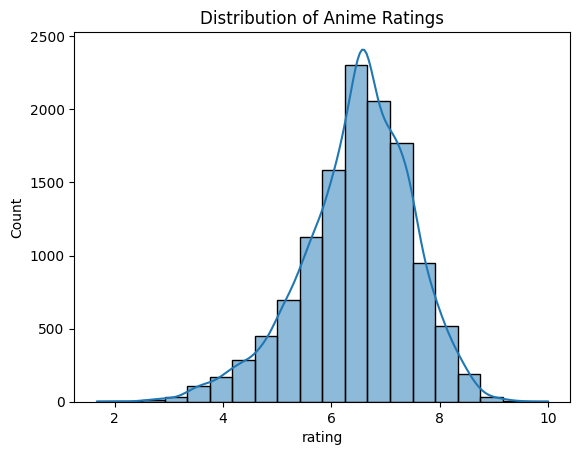

In [6]:
sns.histplot(df['rating'], bins=20, kde=True)
plt.title("Distribution of Anime Ratings")
plt.show()


Popular Anime by Members

In [7]:
df.sort_values('members', ascending=False).head(10)[['name', 'members']]


,name,members
40,Death Note,1013917
86,Shingeki no Kyojin,896229
804,Sword Art Online,893100
1,Fullmetal Alchemist: Brotherhood,793665
159,Angel Beats!,717796
19,Code Geass: Hangyaku no Lelouch,715151
841,Naruto,683297
3,Steins;Gate,673572
445,Mirai Nikki (TV),657190
131,Toradora!,633817


Feature Extraction

Convert Genre into Numerical Form (TF-IDF)

In [8]:
tfidf = TfidfVectorizer(stop_words='english')

genre_matrix = tfidf.fit_transform(df['genre'])


Normalize Numerical Features

In [9]:
scaler = MinMaxScaler()

numeric_features = df[['rating', 'episodes', 'members']]
numeric_scaled = scaler.fit_transform(numeric_features)


Combine All Features

In [10]:
from scipy.sparse import hstack

feature_matrix = hstack([genre_matrix, numeric_scaled])


Recommendation System using Cosine Similarity

Compute Cosine Similarity Matrix

In [11]:
cosine_sim = cosine_similarity(feature_matrix)


Create Recommendation Function

In [12]:
def recommend_anime(anime_title, similarity_threshold=0.3, top_n=10):

    # Get index of the anime
    if anime_title not in df['name'].values:
        return "Anime not found in dataset."

    idx = df[df['name'] == anime_title].index[0]

    # Compute similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Filter based on threshold
    sim_scores = [x for x in sim_scores if x[1] >= similarity_threshold]

    # Sort by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Remove the anime itself
    sim_scores = sim_scores[1:top_n+1]

    # Get recommended anime names
    anime_indices = [i[0] for i in sim_scores]

    return df.loc[anime_indices, ['name', 'genre', 'rating', 'episodes']]


Generate Recommendations

Example Recommendation

In [13]:
recommend_anime("Naruto", similarity_threshold=0.35, top_n=10)


,name,genre,rating,episodes
615,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",7.94,2.0
206,Dragon Ball Z,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.32,291.0
346,Dragon Ball,"Adventure, Comedy, Fantasy, Martial Arts, Shou...",8.16,153.0
1472,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P...",7.53,1.0
1573,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"Action, Comedy, Martial Arts, Shounen, Super P...",7.50,1.0
486,Boruto: Naruto the Movie,"Action, Comedy, Martial Arts, Shounen, Super P...",8.03,1.0
1343,Naruto x UT,"Action, Comedy, Martial Arts, Shounen, Super P...",7.58,1.0
2997,Naruto Soyokazeden Movie: Naruto to Mashin to ...,"Action, Comedy, Martial Arts, Shounen, Super P...",7.11,1.0
588,Dragon Ball Kai,"Action, Adventure, Comedy, Fantasy, Martial Ar...",7.95,97.0
1103,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Martial Arts, Shounen, Super P...",7.68,1.0


Experiment with Threshold Values

In [14]:
recommend_anime("Naruto", similarity_threshold=0.5, top_n=5)


,name,genre,rating,episodes
615,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",7.94,2.0
206,Dragon Ball Z,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.32,291.0
346,Dragon Ball,"Adventure, Comedy, Fantasy, Martial Arts, Shou...",8.16,153.0
1472,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P...",7.53,1.0
1573,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"Action, Comedy, Martial Arts, Shounen, Super P...",7.50,1.0


 Lower threshold → More recommendations

 Higher threshold → More similar but fewer recommendations

Conclusion

The cosine similarity-based recommendation system successfully identifies anime with similar characteristics. Performance can be enhanced by integrating user-based collaborative filtering and advanced feature representations.